plantilla del Autor: Jesus Alvarado-Huayhuaz
inefable12@gmail.com

usado por el alumno: Yerald Ore Becerra yoreb@uni.pe

# Requerimientos

## PyScopus

In [5]:
!pip install pyscopus==1.0.3a2

Librerías



In [16]:
from pyscopus import Scopus
import numpy
import pandas
import requests

### Enlace del Colab con Scopus (API KEY)

*   El usuario debe disponer de una clave **personal**
*   Más información en https://dev.elsevier.com/




In [10]:
key = "4b296461a39b2b251866a2a892aa18d0"
scopus = Scopus(key)

## Búsqueda:

Ejemplo:

TITLE-ABS-KEY((("carrageenan") AND ("hydrogel") AND ("methylene blue") AND ("adsorption")))

In [14]:
s = input("ingresa palabras de busqueda")
search_df = scopus.search(s, count=10,view='STANDARD')

ingresa palabras de busquedaTITLE-ABS-KEY((("carrageenan") AND ("hydrogel") AND ("methylene blue") AND ("adsorption")))


In [15]:
from IPython.display import display
display(search_df)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85198121617,Preparation and properties of cationic starch-...,Food Chemistry,03088146,None,18737072,459,None,2024-11-30,10.1016/j.foodchem.2024.140272,0,[{'name': 'Guangdong Pharmaceutical University...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
1,85195505885,Adsorption of azo dyes onto environmentally fr...,Adsorption,09295607,None,15728757,30,1315-1331,2024-08-01,10.1007/s10450-024-00486-3,0,"[{'name': 'University of the South Pacific', '...",Journal,Article,[],None
2,85188538995,Multiwalled carbon nanotubes@pectin/κ-carragee...,Journal of Applied Polymer Science,00218995,None,10974628,141,None,2024-06-10,10.1002/app.55452,3,[{'name': 'National Center for Radiation Resea...,Journal,Article,[],None
3,85192675854,Adsorption and antibacterial studies of a nove...,Journal of Contaminant Hydrology,01697722,None,18736009,264,None,2024-05-01,10.1016/j.jconhyd.2024.104362,1,[{'name': 'Advanced Technology and New Materia...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
4,85190067871,κ-Carrageenan/poly(sodium styrenesulfonate-co-...,Polymers for Advanced Technologies,10427147,None,10991581,35,None,2024-04-01,10.1002/pat.6375,0,"[{'name': 'Xinjiang University', 'city': 'Urum...",Journal,Article,[],None
5,85188140106,Synergistic adsorption of methylene blue with ...,International Journal of Biological Macromolec...,01418130,None,18790003,265,None,2024-04-01,10.1016/j.ijbiomac.2024.130750,4,"[{'name': 'Jundi Shapur University of Dezful',...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
6,85181077163,Low-cost and eco-friendly PVA/carrageenan memb...,Chemosphere,00456535,None,18791298,350,None,2024-02-01,10.1016/j.chemosphere.2023.140990,16,"[{'name': 'Jeonbuk National University', 'city...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
7,85201409987,pH Sensitive Dual Cross-Linked Anionic and Amp...,Asian Journal of Organic Chemistry,None,None,21935815,None,None,2024-01-01,10.1002/ajoc.202400238,0,[{'name': 'Khulna University of Engineering &a...,Journal,Article,[],None
8,85161026286,Novel kappa-carrageenan− poly (vinyl alcohol) ...,Egyptian Journal of Chemistry,04492285,None,23570245,66,21-35,2023-12-01,10.21608/ejchem.2023.176082.7210,2,"[{'name': 'Faculty of Science', 'city': 'Cairo...",Journal,Article,[],None
9,85173580654,Grafted natural melanin κ-carrageenan hydrogel...,Chemical Engineering Research and Design,02638762,None,None,199,1-10,2023-11-01,10.1016/j.cherd.2023.09.016,4,"[{'name': 'North University of China', 'city':...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...


## Artículos, conference papers, books, etc

In [17]:
search_df.subtype_description.unique()

array(['Article'], dtype=object)

<ipython-input-18-c525a455e4cc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')


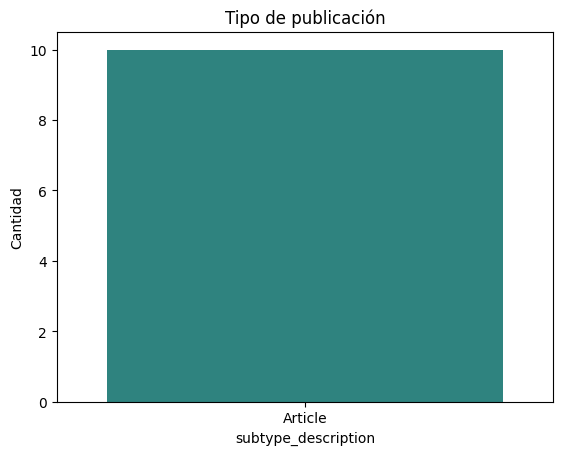

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada tipo de publicación y ordenar los datos por el índice
subtype_description = search_df['subtype_description'].value_counts()

# Crear el gráfico de barras con coloración por tipo de publicación
ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')

# Agregar etiquetas y título
plt.ylabel('Cantidad')
plt.title('Tipo de publicación')

# Formatear el eje y con un decimal
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Mostrar el gráfico
plt.show()

In [19]:
import pandas as pd

# Dividir la columna "cover_date" y crear la columna "year"
search_df['year'] = search_df['cover_date'].apply(lambda x: x.split('-')[0])

In [20]:
search_df.head(3)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text,year
0,85198121617,Preparation and properties of cationic starch-...,Food Chemistry,03088146,None,18737072,459,None,2024-11-30,10.1016/j.foodchem.2024.140272,0,[{'name': 'Guangdong Pharmaceutical University...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...,2024
1,85195505885,Adsorption of azo dyes onto environmentally fr...,Adsorption,09295607,None,15728757,30,1315-1331,2024-08-01,10.1007/s10450-024-00486-3,0,"[{'name': 'University of the South Pacific', '...",Journal,Article,[],None,2024
2,85188538995,Multiwalled carbon nanotubes@pectin/κ-carragee...,Journal of Applied Polymer Science,00218995,None,10974628,141,None,2024-06-10,10.1002/app.55452,3,[{'name': 'National Center for Radiation Resea...,Journal,Article,[],None,2024


## Frecuencia de publicaciones por año

<ipython-input-28-ea52143cf8a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


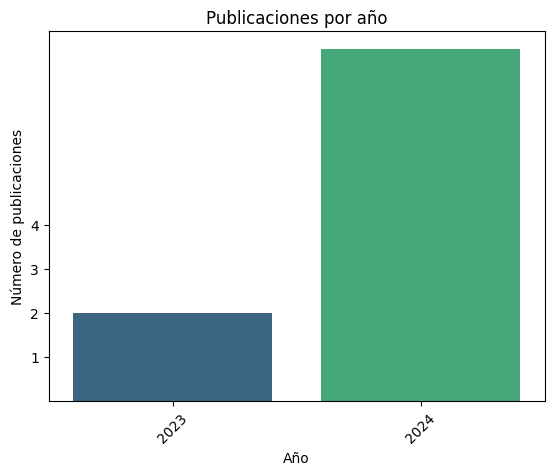

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada año y ordenar los datos por el índice
year_counts = search_df['year'].value_counts().sort_index()

# Crear el gráfico de barras con coloración por año
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de publicaciones')
plt.title('Publicaciones por año')
plt.xticks(rotation=45)

# Establecer los valores del eje y
ax.set_yticks([1, 2, 3, 4])

# Mostrar el gráfico
plt.show()

In [35]:
search_df.citation_count.unique()

array([ 0,  3,  1,  4, 16,  2])

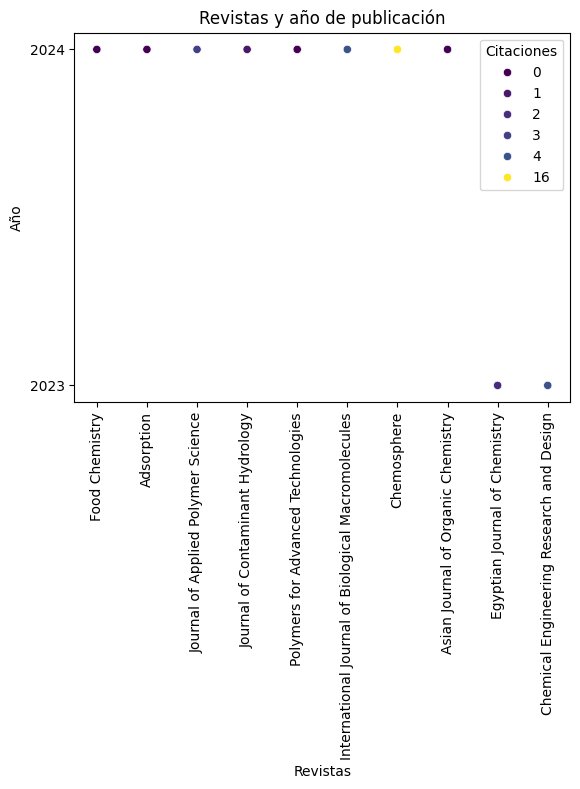

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(search_df) #.sort_index(ascending=False)

# Crear el gráfico de dispersión con coloración por recurrencia
sns.scatterplot(data=df, x='publication_name', y='year', hue='citation_count', palette='viridis')

# Agregar etiquetas y título
plt.xlabel('Revistas')
plt.ylabel('Año')
plt.title('Revistas y año de publicación')
plt.xticks(rotation=90)

# Cambiar el título de la leyenda
plt.legend(title='Citaciones')

# Mostrar el gráfico
plt.show()

### Análisis descriptivo

In [41]:
print("Cantidad de Filas y columnas:", search_df.shape)

Cantidad de Filas y columnas: (10, 17)


In [42]:
print('Nombre columnas:',search_df.columns)

Nombre columnas: Index(['scopus_id', 'title', 'publication_name', 'issn', 'isbn', 'eissn',
       'volume', 'page_range', 'cover_date', 'doi', 'citation_count',
       'affiliation', 'aggregation_type', 'subtype_description', 'authors',
       'full_text', 'year'],
      dtype='object')


In [39]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scopus_id            10 non-null     object
 1   title                10 non-null     object
 2   publication_name     10 non-null     object
 3   issn                 9 non-null      object
 4   isbn                 0 non-null      object
 5   eissn                9 non-null      object
 6   volume               9 non-null      object
 7   page_range           3 non-null      object
 8   cover_date           10 non-null     object
 9   doi                  10 non-null     object
 10  citation_count       10 non-null     int64 
 11  affiliation          10 non-null     object
 12  aggregation_type     10 non-null     object
 13  subtype_description  10 non-null     object
 14  authors              10 non-null     object
 15  full_text            5 non-null      object
 16  year       

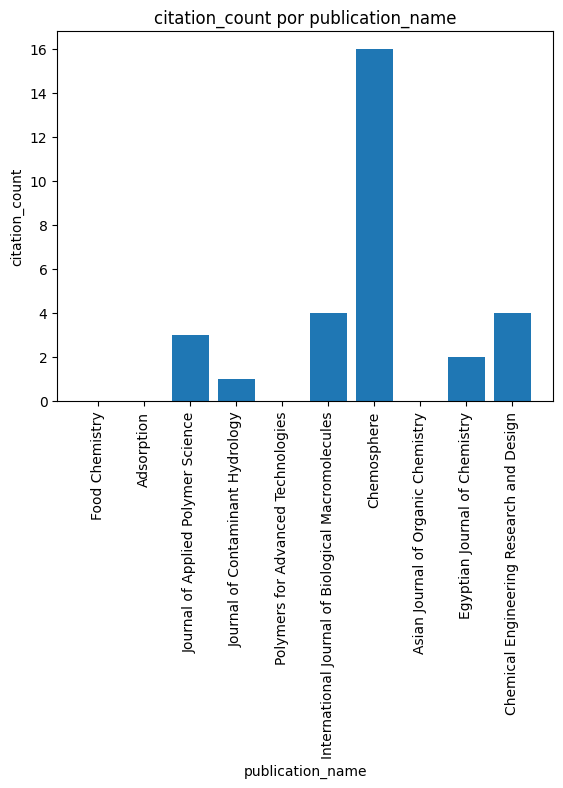

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(search_df)

# Crear el gráfico de barras
plt.bar(df['publication_name'], df['citation_count'])

# Agregar etiquetas y título
plt.xlabel('publication_name')
plt.ylabel('citation_count')
plt.title('citation_count por publication_name')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()